# Tree-based method
--------------------------------------------------

Tree 모형은 입력 변수와 출력 변수 간의 비선형적인 관계를 학습하기 위해 사용되는 지도 학습 알고리즘이다.

이 장에서는 regression과 classification에 대한 tree 기반 방법에 대해 알아본다.

결과적으로 Tree 모형은 입력 변수에 기반한 일종의 조건문들을 통해 출력 변수를 예측한다.<br><br>

* 기본적인 아이디어는 predictor space를 여러 부분으로 분할하는 것. <br><br>

* Decision-tree (결정 트리)라고도 한다. <br><br>

* Tree는 일련의 node들로 구성되며, 각 node는 하나의 분기점을 나타낸다. <br><br>

* 각 분기점에서 입력 변수의 값에 따라 tree는 다음 분기점으로 이동하며, 이러한 과정을 반복하여 Tree 모형은 최종적으로 출력 변수를 예측한다. <br><br>

### 트리 방법의 장단점

장점

* 트리 기반 방법은 간단하고 interpretation이 쉽다. 즉, 모형 결과를 해석하기 쉽고, feature 변수의 영향력 파악이 쉽다. (선형회귀보다도)

* 어떤 사람들은 의사 결정 트리가 이전 장에서 보았던 회귀 및 분류 접근 방식보다 인간의 의사 결정을 더 가깝게 반영한다고 생각함.

* 트리는 그래픽으로 표시할 수 있으며 비전문가도 쉽게 해석가능.

* 더미변수 없이 질적 예측 변수를 쉽게 처리함.

* 비선형적 관계를 학습할 수 있다.

* 결측치나 이상치에 대한 처리가 쉽다.

* 계산 속도가 빠르다.


단점

* 하지만 예측 정확성 측면에서는 다른 방법들에 비해 떨어지는 경향이 있다.

* 트리가 커지면 복잡성이 증가하고 과적합이 발생할 수 있다.

* Bagging, random forest, boosting 방법을 추가적으로 적용하여 위 단점을 보완할 수 있다.

* 여러 개의 tree들을 혼합하는 방식으로 예측 정확도가 향상되지만, 해석은 힘들어질 수 있다.

### 회귀 문제와 분류 문제

트리 모형은 회귀 문제와 분류 문제 모두에 적용될 수 있다.

* 회귀 문제 : 종속 변수 $y$가 실수 값을 가지는 경우
  * 예를 들어, 주택 가격을 예측하는 문제에서 Tree 모형은 주택 가격을 예측하기 위해 특징을 사용. 
  * 이 경우 Tree 모형은 특징을 사용하여 각 분기점에서 종속 변수의 값을 예측하고, 이를 통해 전체 Tree를 통해 종속 변수를 예측. <br><br>
  
* 분류 문제 : 종속 변수 $y$가 이산형으로서 클래스 레이블로 표현될 때
  * 예를 들어, 회사에서 고객이 떠날지 남을지 예측하는 문제

## Decision-tree

다음은 야구 선수의 연봉에 대한 예제이다. 

* 연봉은 실수 값이므로 회귀나무이다.

* Blue, green은 낮은 연봉을, yellow, red는 높은 연봉을 의미한다.

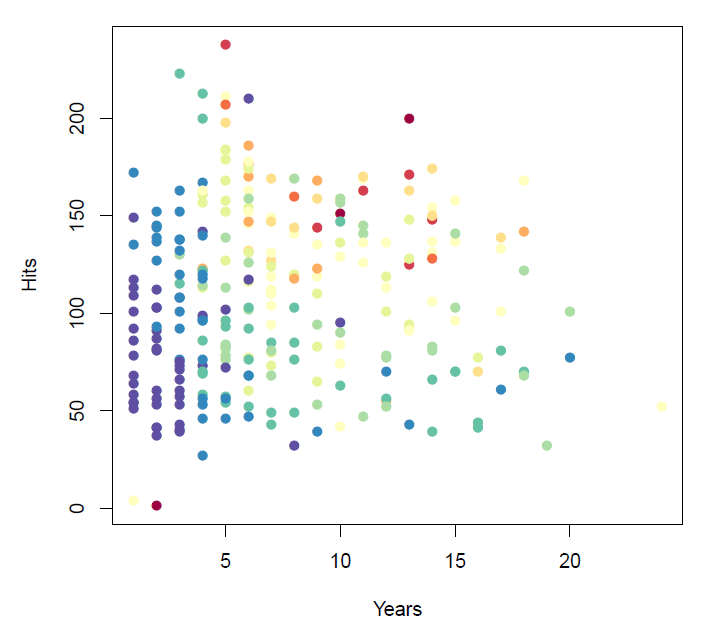

연봉 예측에 대해 다음의 decision tree를 생각해 보자.
* Years와 Hits라는 두 특성 변수를 사용하고 있다.

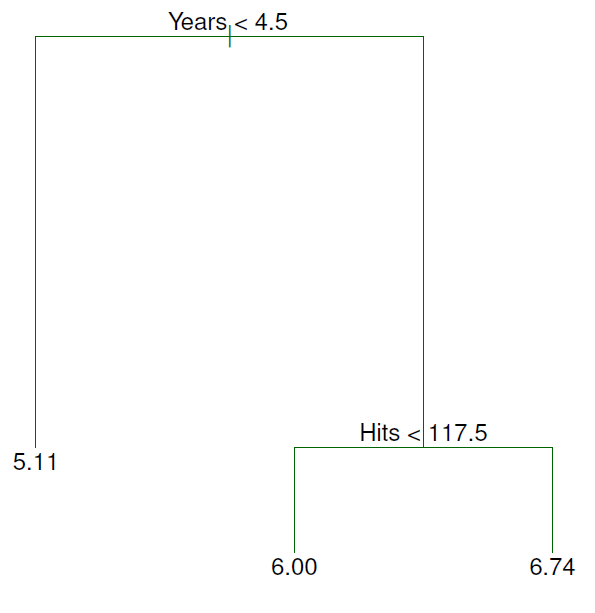

트리 모형은 위와 같이 나무 그림의 형태로 표현되기도 하고, 아래 그림처럼 특성변수 공간을 직선으로 나눈 형태로 표현되기도 한다.

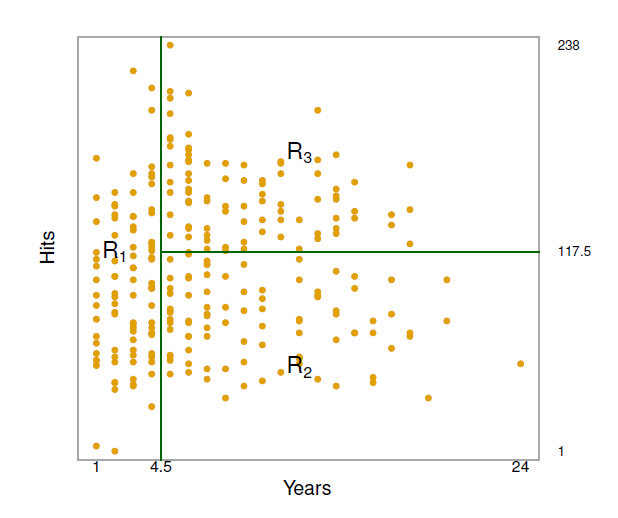

즉,

$$ R_1 = \{X | \mathrm{Years} < 4.5  \} $$
$$ R_2 = \{X | \mathrm{Years} \geq 4.5, \mathrm{Hits} < 117.5  \} $$
$$ R_3 = \{X | \mathrm{Years} \geq 4.5, \mathrm{Hits} \geq 117.5  \} $$

여기서 $R_1, R_2, R_3$를 terminal node 혹은 leaf node라고 부른다.

트리에서 분기가 되는 노드를 internal node라고 부른다. 

위 트리에서는 $\mathrm{Years} < 4.5$와 $\mathrm{Hits} < 117.5$로 표현되는 부분이다.

### Tree v.s. linear model

실제 boundary의 형태에 따라 linear 모형과 tree 모형 중 더 잘 적합되는 것이 있을 것이다.

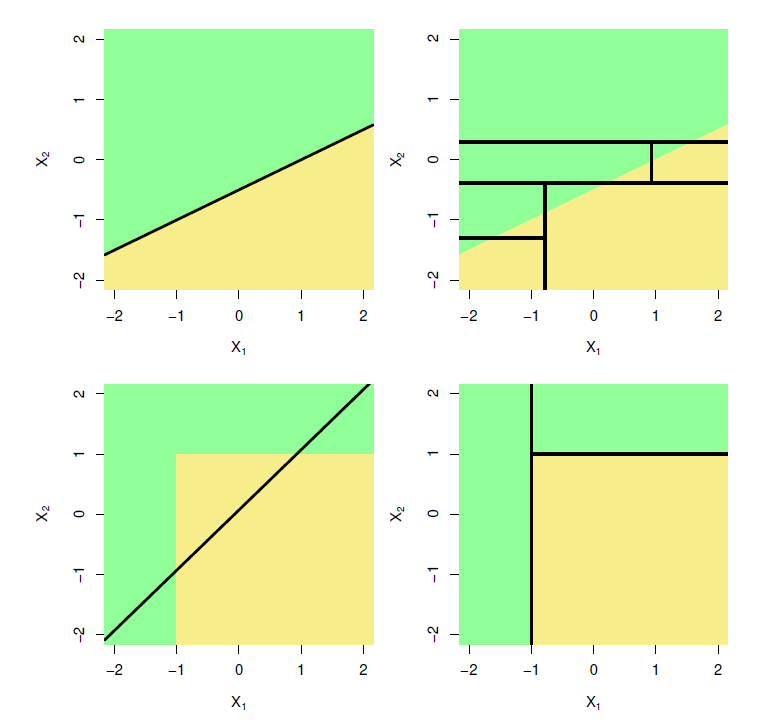

### 트리로 만들 수 있는 구역들과 그렇지 않은 구역들

다음은 그림의 왼쪽 위는 트리로는 만들 수 없는 구역들을 나타낸 예제이다.

나머지는 5개의 영역으로 분할된 트리의 예제이다.

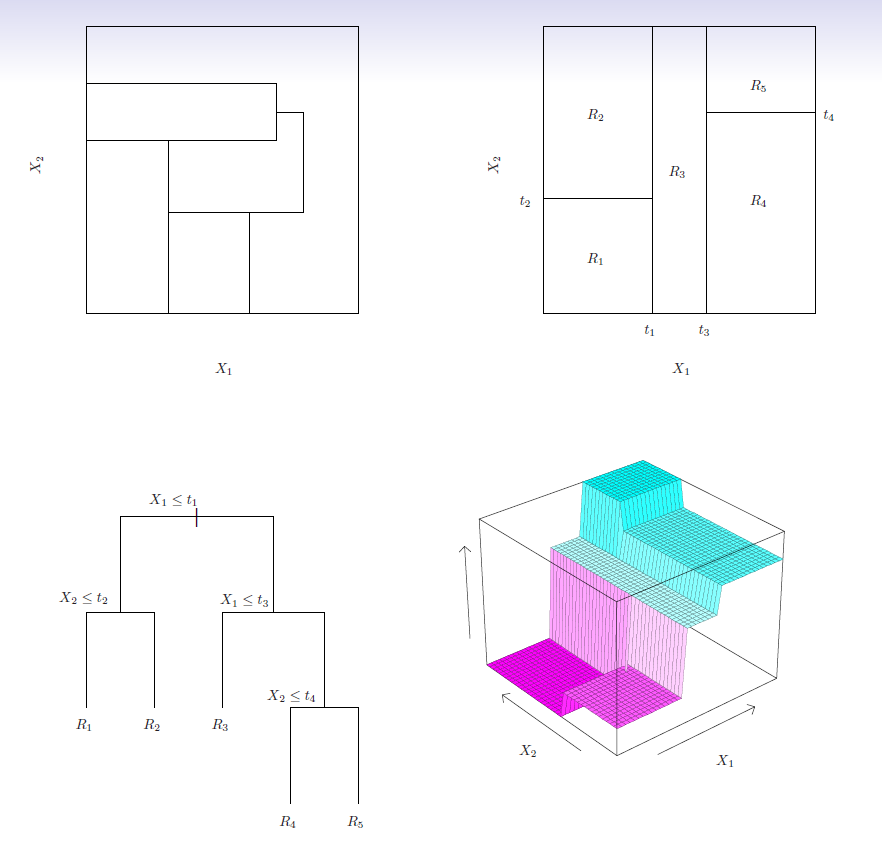

### 예측

특성 변수를 기준으로 해당 테스트 관찰값이 속한 영역을 찾는다.

해당 영역의 트레이닝 관찰값 $y$들의 평균이 곧 이 테스트 관찰값의 예측치이다.

## Tree-building process

### 훈련

Regression 문제에서 트리를 생성하는 궁극적인 목적은 다음을 최소화하는 구역들 $R_j$를 찾는 것이다.

$$\mathrm{RSS} =  \sum_{j=1}^{J} \sum_{i \in R_j} (y_i - \hat y_{R_j})^2 $$

여기서

 * $J$는 구역의 개수

 * $\hat y_{R_j}$는 구역 $R_j$에서의 트리 모형에 의한 예측값으로 $R_j$ 구역에 속하는 모든 데이터에 대해 동일하며, 구역 내 $y_i$의 평균
 
 * $y_i$는 실제 관찰값

하지만, 위 값을 최소화하는 구역들을 찾는 것은 계산적으로 어려운 문제이다.
* 모든 가능한 트리들을 살펴봐야하기 때문이다.

대신 top-down 혹은 greedy approach 혹은 recursive binary splitting이라고 불리우는 방법을 이용한다.

트리의 가장 위에서부터 시작하여 각각의 스텝에서 최적의 split을 찾는 방식이다.

자세한 과정은 다음과 같다.

* 먼저 $\{X | X_j < s \}$ 와 $\{X | X_j \geq s \}$로 나누었을 때 RSS를 가장 줄이게 되는 $X_j$와 $s$를 찾는다.


* 다음 스텝들에서 이 과정을 반복하며, best predictor와 해당되는 best cutpoint를 찾는다.

   * 하지만 이 때 전체 predictor space를 나누는 것이 아니라, 앞 단계에서 나뉘어진 구역들을 둘로 나누어야 한다.
   
   
* 적절한 criterion에 도달할 때까지 반복한다.

## Sickit-learn에서 regression tree

### [sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#)

#### 예제 : 간단한 데이터 셋

간단한 가상의 데이터를 통해 회귀 나무 예제를 살펴본다.

`sklearn.tree.DecisionTreeRegressor`는 sklearn에서 회귀 분석을 위한 결정 트리를 구현한 클래스이다. 여러 parameter 중 일부를 소개한다.

* `max_depth` : 트리의 최대 깊이, 깊이는 분할 횟수를 결정하며,  깊이가 너무 깊으면 과적합이 발생할 수 있음 

* `min_samples_leaf`: 리프 노드에 있어야 할 최소 샘플 수. 이 값이 너무 작으면 과적합이 발생할 수 있음. 기본값은 1로 리프 노드는 하나의 샘플로 구성될 수 있음. 

* `min_samples_split`: 분할하기 위해 노드에서 필요한 최소 샘플 수. 이 값이 너무 작으면 과적합이 발생할 수 있음. 

* `max_features` : 분할마다 모든 특성을 고려하지 않고, 지정된 개수의 특성 중에서 선택하도록 할 수 있다.

In [1]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

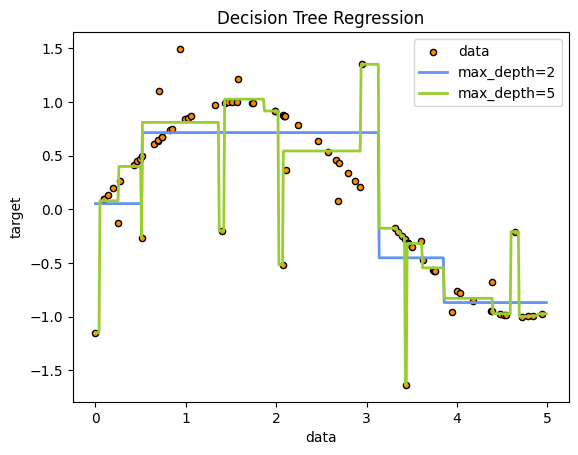

In [2]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth = 2)
regr_2 = DecisionTreeRegressor(max_depth = 5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

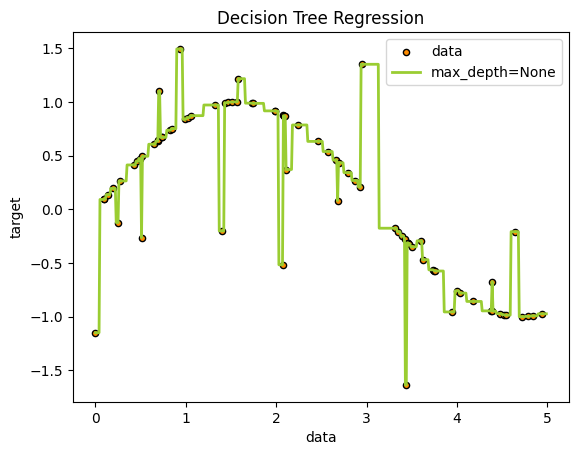

In [3]:
# Fit regression model
regr_3 = DecisionTreeRegressor()
regr_3.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_3, color="yellowgreen", label="max_depth=None", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

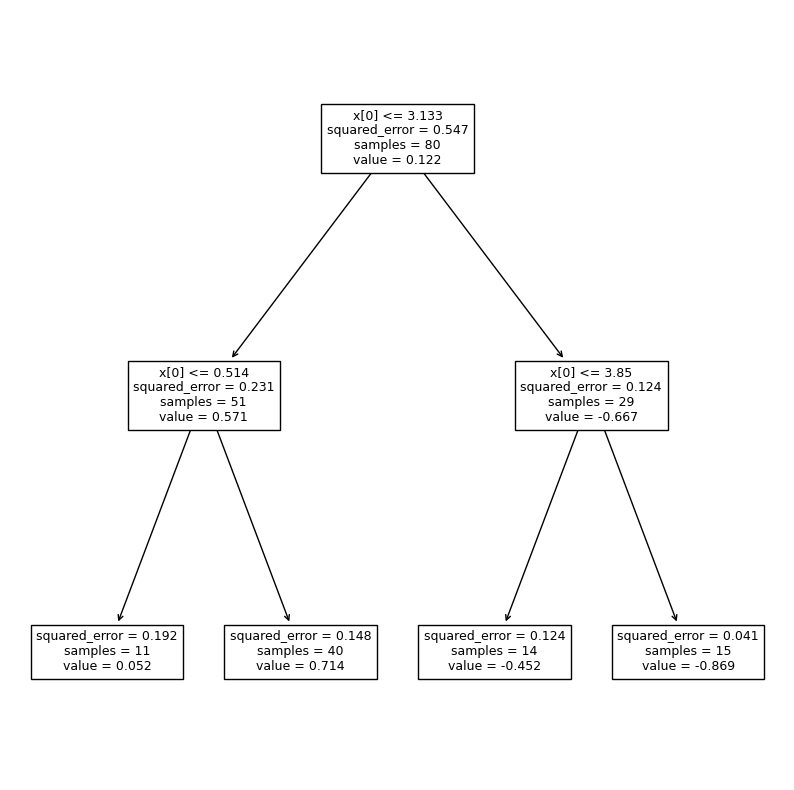

In [4]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(regr_1, fontsize=9)
plt.show()

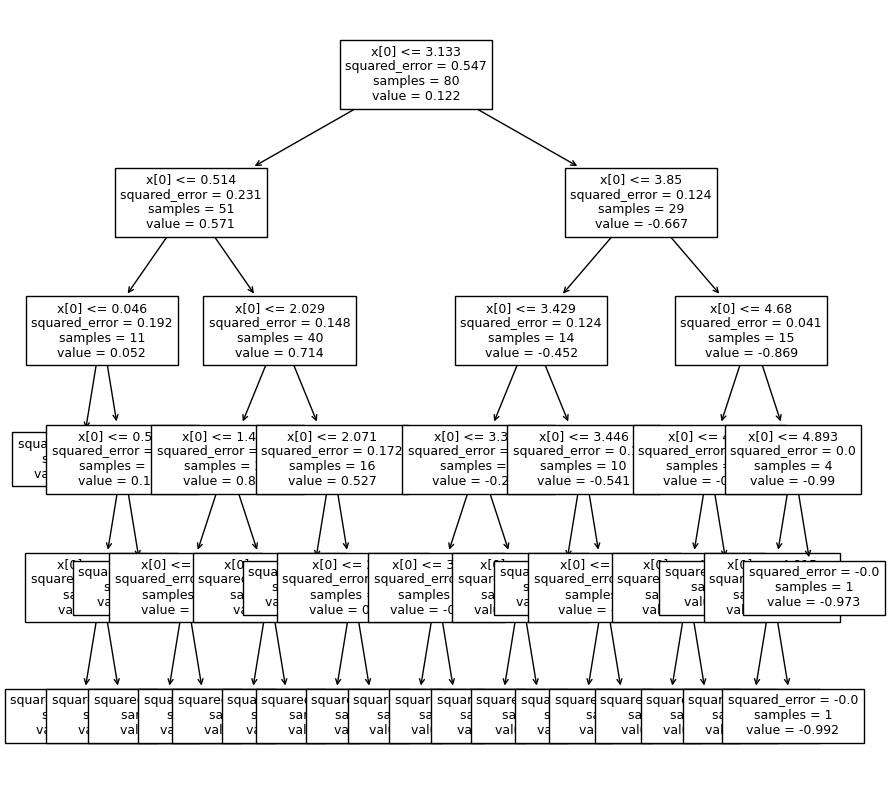

In [5]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(regr_2, fontsize=9)
plt.show()

## 분류 문제 - Classification tree

Regression tree와 비슷하게 classification tree를 생성할 수 있다.

Classification tree를 통해 예측할 때는 해당 구역에서 가장 많이 발생하는 클래스로 예측하면 된다.

### classification error rate

트리 생성에서 cost function으로 classification error rate을 고려해 볼 수 있다.

이것은 훈련 데이터 중 해당 지역에서 가장 흔한 클래스에 속하지 않는 비율을 의미한다.

$$  E = 1 - \max_{k} (\hat p_{mk})$$

여기서 $\hat p_{mk}$는 $m$번째 구역에서 데이터의 $y$값이 $k$ 클래스에 속하는 비율이다.

하지만, 이 방법은 트리 생성에 적합하지 않다는 것이 알려져 있어 다음의 다른 방법들을 생각해 보자.

### Gini index

Gini index는 다음으로 정의된다.

$$ G = \sum_{k=1}^{K} \hat p_{mk} (1 - \hat p_{mk}) $$

만약 $\hat p_{mk}$가 0 혹은 1에 가까우면 Gini index는 작은 값을 가진다.

Gini index는 해당 노드의 purity를 측정한다고도 한다.

작은 Gini index는 해당 노드가 거의 대부분 하나의 클래스로 이루어짐을 뜻한다.

### Cross-entropy

또다른 대안으로 cross-entropy가 있다.

$$ D = - \sum_{k=1}^{K} \hat p_{mk} \log \hat p_{mk}. $$

Tree 모형에서 Gini index와 cross-entropy를 이용한 훈련은 거의 같은 결과를 이끌어낸다고 알려져 있다.

다른 내용은 regression tree와 비슷하다.

다음은 심장병의 유무를 진단하는 classification tree의 한 예제이다. 

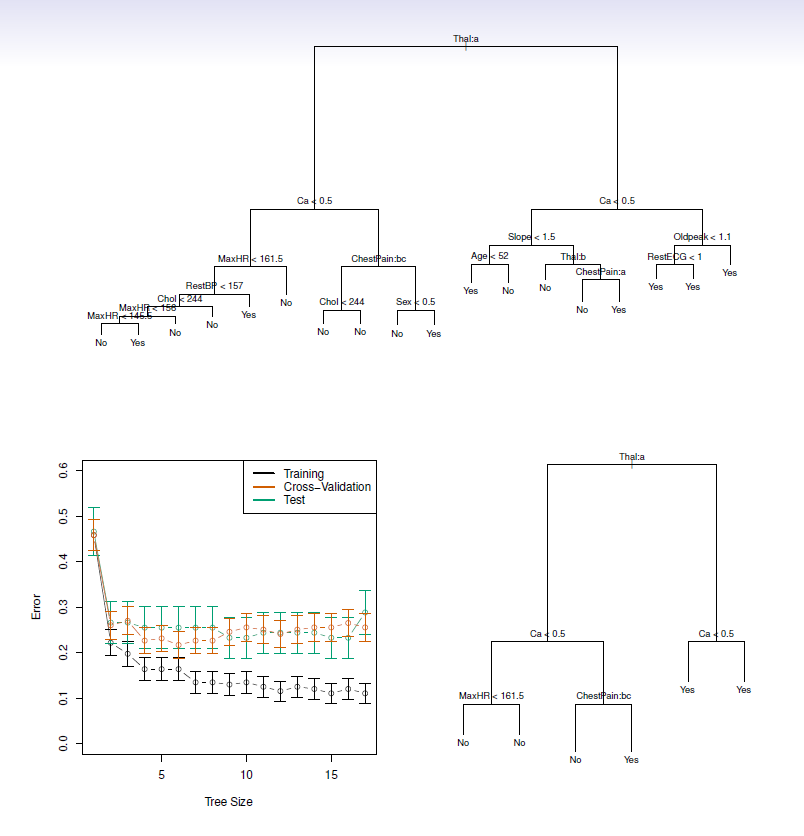

### sklearn에서 CART 알고리즘

sklearn은 tree를 훈련시킬 때, CART (classification and regression tree) 알고리즘을 사용한다.

전반적인 방법은 위 Tree-building process에서 설명한 바와 같다.

이 알고리즘에서는 어떤 predictor $k$와 임계값 $t_k$를 사용해 데이터 집합을 둘로 나누는 행위를 반복한다.

분류 문제의 경우 이때 최소화하는 비용함수는 다음과 같다.

$$ J(k, t_k) = \frac{m_1}{m} G_1 + \frac{m_2}{m} G_2 $$

여기서 $G_1$과 $m_1$은 1번 subset의 불순도와 샘플 수이고, $G_2$과 $m_2$은 2번 subset의 불순도와 샘플 수이다.

불순도는 분류의 경우 지니 불순도 혹은 엔트로피가 사용된고, 회귀의 경우 불순도 대신 MSE가 사용된다.

CART 알고리즘은 과적합(overfitting) 문제가 발생할 수 있으므로, 위에서 설명한 적절한 가지치기(pruning) 기법을 사용하여 모델을 최적화할 수 있다.

### [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#)

`sklearn.tree.DecisionTreeClassifier`도 regression tree와 비슷하게 이용할 수 있다.

#### 예제 : Iris 데이터

[`sklearn.datasets.load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) 데이터를 이용한 예제를 살펴본다.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

iris = load_iris()

아래에서 경계선을 그리기 위한 수단으로 [`DecisionBoundaryDisplay.from_estimator`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay.from_estimator)를 사용하였다.

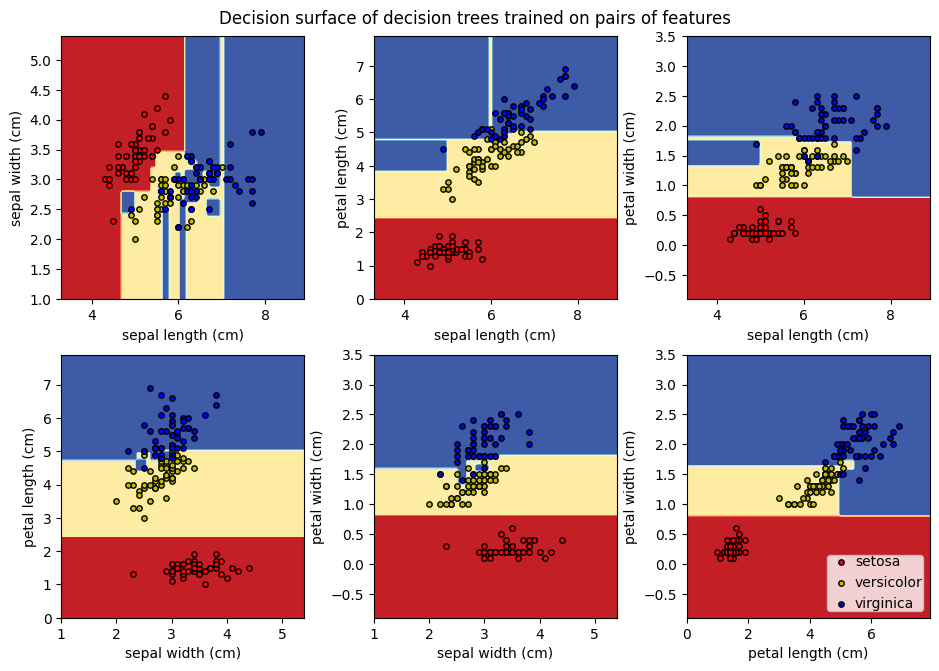

In [7]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

plt.figure(figsize=(10, 7))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            color = color,
            label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

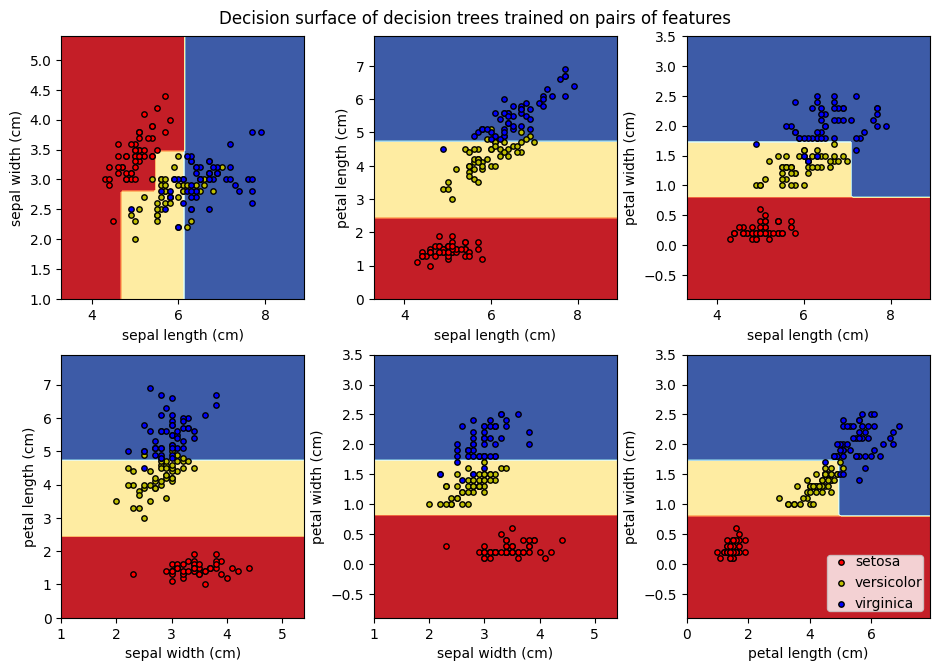

In [8]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

plt.figure(figsize=(10, 7))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(max_depth=3).fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            color = color,
            label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

Test 셋에 대한 평가

[`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)를 이용하여 훈련/테스트 셋 분할

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
tclf = DecisionTreeClassifier(criterion='gini', max_depth=3).fit(X = X_train, y = y_train)

In [10]:
y_train_pred = tclf.predict(X_train)
y_test_pred = tclf.predict(X_test)

[`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)를 이용하여 정확성 측정

In [11]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

[`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)의 i번째 행과 j번째 열 항목은 실제 레이블이 i번째 클래스이고 예측 레이블이 j번째 클래스인 샘플의 수를 나타낸다.

In [12]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  7]], dtype=int64)

[`sklearn.metrics.classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)를 통해 주요 결과를 요약할 수 있다.

In [13]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_test_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.88      1.00      0.93         7

    accuracy                           0.97        38
   macro avg       0.96      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#### 예제 : wine 데이터 셋

In [14]:
from sklearn import datasets
raw_wine = datasets.load_wine()
X, y = raw_wine.data, raw_wine.target

In [15]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y)

In [16]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std, X_te_std = std_scale.transform(X_tn), std_scale.transform(X_te)

In [17]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_tn_std, y_tn)

DecisionTreeClassifier()

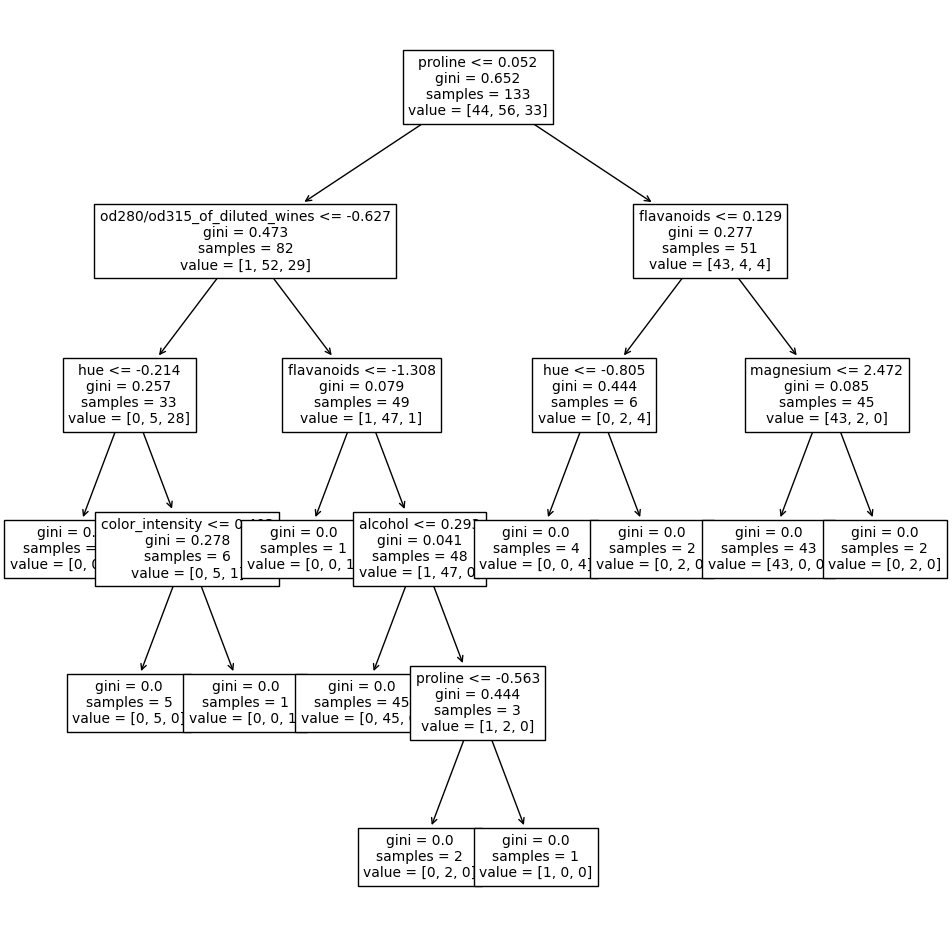

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)              
tree.plot_tree(clf_tree,  fontsize=10, feature_names=raw_wine['feature_names'])
plt.show()

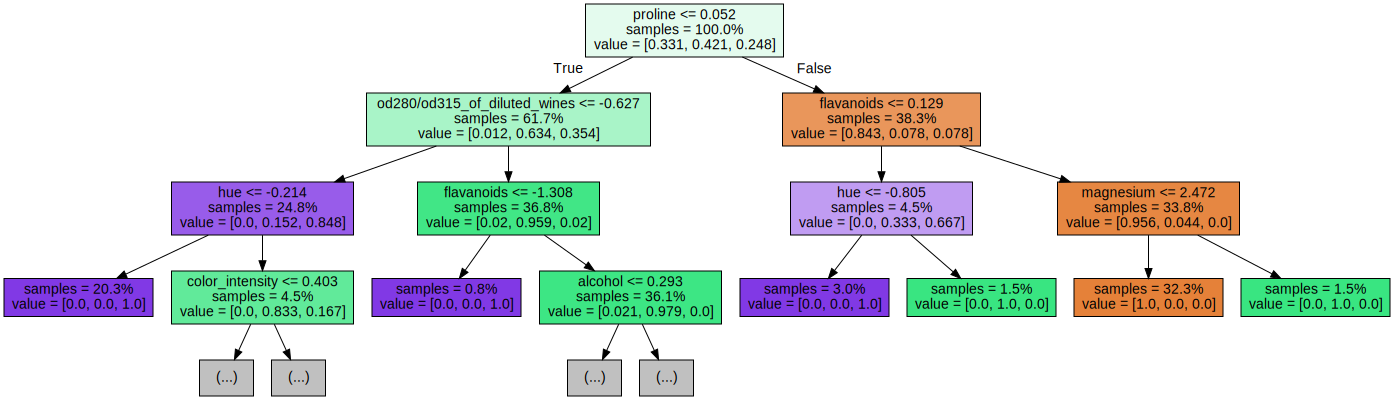

In [19]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf_tree,
                           feature_names = raw_wine.feature_names,  
                           filled=True,  
                           max_depth=3, 
                           impurity=False, 
                           proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

In [20]:
from sklearn.tree import export_text
r = export_text(clf_tree, feature_names=raw_wine['feature_names'])
print(r)

|--- proline <= 0.05
|   |--- od280/od315_of_diluted_wines <= -0.63
|   |   |--- hue <= -0.21
|   |   |   |--- class: 2
|   |   |--- hue >  -0.21
|   |   |   |--- color_intensity <= 0.40
|   |   |   |   |--- class: 1
|   |   |   |--- color_intensity >  0.40
|   |   |   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  -0.63
|   |   |--- flavanoids <= -1.31
|   |   |   |--- class: 2
|   |   |--- flavanoids >  -1.31
|   |   |   |--- alcohol <= 0.29
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  0.29
|   |   |   |   |--- proline <= -0.56
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- proline >  -0.56
|   |   |   |   |   |--- class: 0
|--- proline >  0.05
|   |--- flavanoids <= 0.13
|   |   |--- hue <= -0.80
|   |   |   |--- class: 2
|   |   |--- hue >  -0.80
|   |   |   |--- class: 1
|   |--- flavanoids >  0.13
|   |   |--- magnesium <= 2.47
|   |   |   |--- class: 0
|   |   |--- magnesium >  2.47
|   |   |   |--- class: 1



In [21]:
pred = clf_tree.predict(X_te_std)
print(pred)
print(y_te)

[0 2 2 2 1 0 0 1 0 2 0 1 2 1 2 1 0 0 2 2 1 2 0 0 0 0 2 2 1 0 0 2 1 0 2 2 0
 1 0 2 2 2 1 1 1]
[0 2 2 2 1 0 0 1 0 2 0 1 2 1 1 1 0 0 2 2 1 2 0 0 0 0 2 1 1 0 1 2 1 0 2 2 0
 1 0 2 2 2 1 1 1]


In [22]:
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.80      0.89        15
           2       0.88      1.00      0.94        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



#### 예제 : 인구 조사 데이터셋

In [23]:
import pandas as pd
df_census = pd.read_csv("https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter02/census_cleaned.csv")

In [24]:
X = df_census.iloc[:,:-1]
y = df_census.iloc[:,-1]

In [25]:
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income_ >50K, Length: 32561, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y)

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [29]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
clf.score(X_test, y_test)

0.8121852352290874

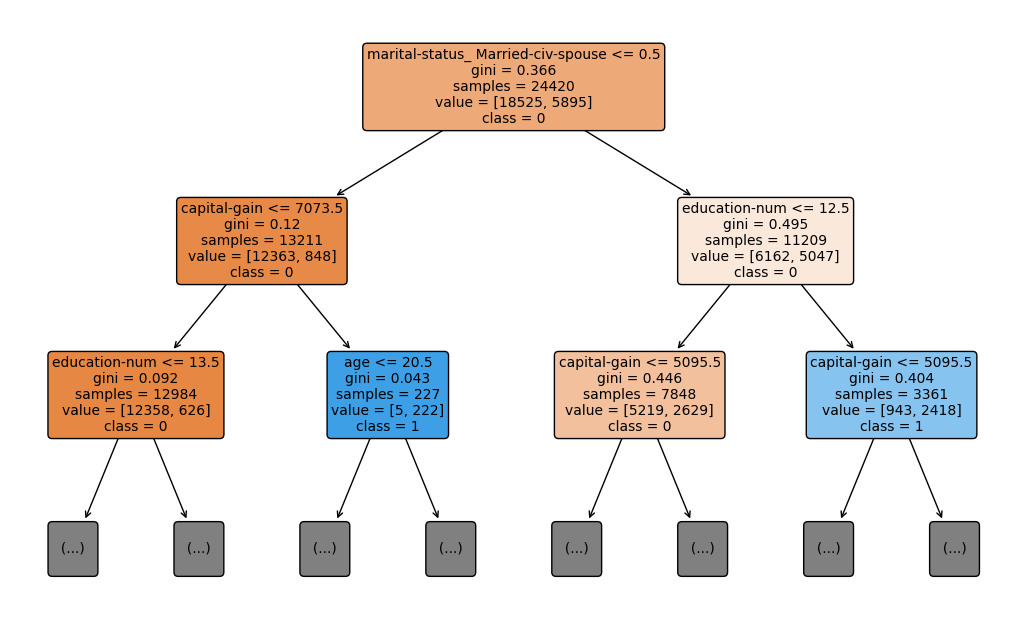

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(13,8))
plot_tree(clf, max_depth=2, feature_names=list(X.columns), class_names=['0', '1'],
          filled=True, rounded=True, fontsize=10)
plt.show()

#### 예제 - 심장 질환 데이터셋

In [32]:
df_heart = pd.read_csv("https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter02/heart_disease.csv")

In [33]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
X = df_heart.iloc[:,:-1]
y = df_heart.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

model = DecisionTreeClassifier(random_state=2)

scores = cross_val_score(model, X, y, cv=5)

print('정확도:', np.round(scores, 2))

print('정확도 평균: %0.2f' % (scores.mean()))

정확도: [0.74 0.85 0.77 0.73 0.7 ]
정확도 평균: 0.76


[sklearn.model_selection.RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) 를 통해 최적의 hyperparameter를 찾아보자.

이것은 Scikit-learn 라이브러리에서 제공하는 랜덤 서치 기반의 교차 검증(Cross-Validation)을 수행하는 클래스로, 
모델의 하이퍼파라미터(Hyperparameter) 공간에서 랜덤하게 샘플링하여 최적의 하이퍼파라미터 조합을 탐색할 수 있다.

In [36]:
from sklearn.model_selection import RandomizedSearchCV

params={
        'criterion':['entropy', 'gini'],
        'splitter':['random', 'best'],
        'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
        'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
        'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
        'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
        'max_features':['sqrt', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
        'max_depth':[None, 2,4,6,8],
        'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
    }

rand_clf = RandomizedSearchCV(clf, params, n_iter=100, cv=5, n_jobs=-1)
    
rand_clf.fit(X_train, y_train)

best_model = rand_clf.best_estimator_
best_score = rand_clf.best_score_

print("훈련 점수: {:.3f}".format(best_score))

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('테스트 점수: {:.3f}'.format(accuracy))

훈련 점수: 0.824
테스트 점수: 0.737


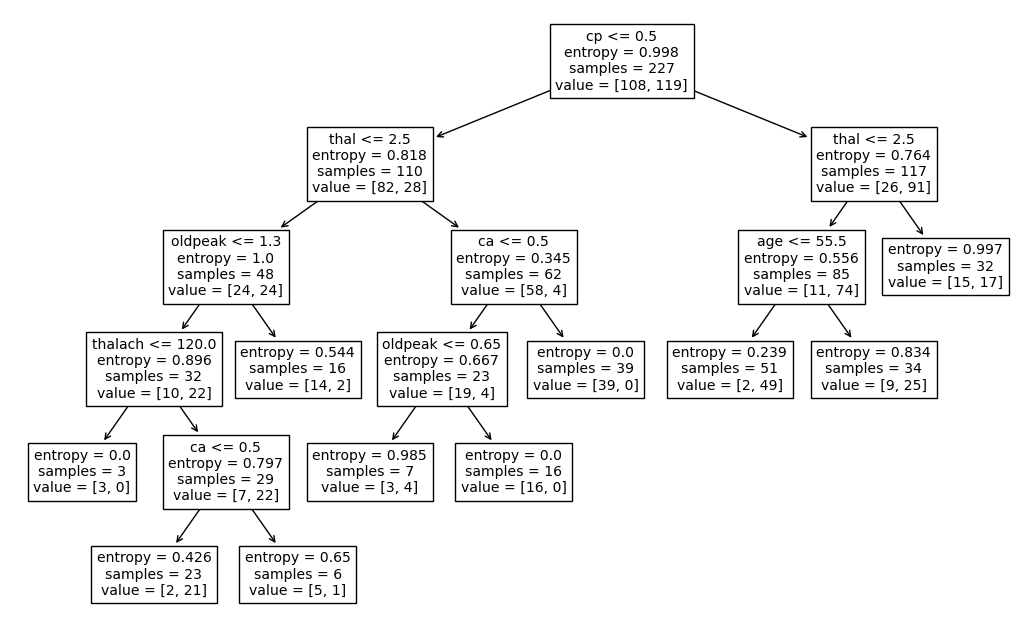

In [37]:
plt.figure(figsize=(13,8))
plot_tree(best_model, feature_names=list(X.columns))
plt.show()

In [38]:
best_model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_features=0.7, max_leaf_nodes=10,
                       min_impurity_decrease=0.005, min_samples_leaf=0.01,
                       min_samples_split=4, min_weight_fraction_leaf=0.0025)

`feature_importance_`는 Scikit-learn에서 다양한 모델에서 제공되는 attribute)으로, 학습된 모델에서 각 특성(feature)의 중요도를 나타내는 정보를 제공한다.

중요도 값은 일반적으로 0과 1 사이의 값이며, 값이 클수록 해당 특성이 예측에 더 큰 영향을 미친다는 것을 의미한다.

In [39]:
best_model.feature_importances_

array([0.03963688, 0.        , 0.21872617, 0.        , 0.        ,
       0.        , 0.03503339, 0.        , 0.15070775, 0.10544609,
       0.        , 0.32491509, 0.12553463])

In [40]:
list(X.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [41]:
for feature, importance in zip(list(X.columns), best_model.feature_importances_):
    print(feature, importance)

age 0.03963688294251101
sex 0.0
cp 0.2187261708490289
trestbps 0.0
chol 0.0
fbs 0.0
restecg 0.0350333915316351
thalach 0.0
exang 0.15070774720180752
oldpeak 0.1054460903061207
slope 0.0
ca 0.32491508889301046
thal 0.1255346282758863


## 과대적합 문제 

일반적인 트리 생성 방법은 overfit이 발생해 테스트 에러가 좋지 않을 가능성이 높다.

각 셀에 데이터가 한 개 남을 때까지 분할을 진행할 수 있기 때문이며, 이렇게 만들어진 트리는 매우 많은 노드들이 생성된다.

더 적은 분할을 가지는 트리가 bias도 작으면서 적은 분산과 높은 설명력을 가질 가능성이 높다.

한 가지 대안은 분할을 하였을 때 에러를 충분히 줄이지 못한다면 트리 분할을 멈추는 방법이다.

* 하지만 현재 분할이 에러를 많이 줄이지 못하더라도 나중에 궁극적으로는 RSS의 향상을 가져오는 경우도 있으므로 이 방법은 주의해야 한다.

### Pruning a tree

더 나은 방법은 일단 큰 트리 $T_0$를 만든 후에 더 작은 트리로 pruning하는 방법 (cost complexity pruning)이다.

먼저 다음을 정의하자.

* $\alpha$는 nonnegative tuning parameter로 양의 실수이다. <br><br>

* $|T|$를 트리 $T$의 terminal node 수라고 하자. <br><br>

그러면 각 $\alpha$에 대해 다음을 최소화하는 subtree $T \subset T_0$가 존재한다.

$$ \sum_{m=1}^{|T|} \sum_{i: x_i \in R_m} (y_i - \hat y_{R_m})^2 + \alpha |T| $$

 * 즉, 트리 크기에 비례한 $\alpha |T|$의 penalty 항이 존재하는 값. <br><br>
 
   * $\alpha$가 클수록 더 간단한 트리가 유도됨.<br><br>

 * $\alpha$는 subtree의 complexity와 훈련 데이터의 fitting 정도와의 trade-off를 컨트롤한다. <br><br>

    * Cross-validation 방법을 통해 최적의 $\hat \alpha$를 찾을 수 있다.<br><br>


알고리즘을 요약하자면 다음과 같다.

* Step 1 : 위에서 설명한 Recursive binary splitting으로 가능한 큰 트리를 만든다. 각 terminal node에 해당되는 샘플의 숫자가 미리 정한 minimum number보다 작아질 때까지 반복한다. <br><br>

* Step 2 : Cost complexity pruning을 적용하여 여러 $\alpha$에 대한 best subtree를 찾는다. <br><br>

  * 이론상으로 $\alpha$는 모든 양의 실수값이 가능하나, 모든 양의 실수에 대해 작업할 수는 없으므로 적절한 $\alpha$값들을 미리 정한다. <br><br>

* Step 3 : K-fold cross validation을 이용하여 최적의 $\alpha$를 선택한다. 모든 $k = 1, \cdots, K$에 대해 <br><br>

  * Step 1과 2를 데이터의 $k$번째를 제외한 $\frac{K-1}{K}$ 부분에 대해 반복한다. <br><br>
  
  * $k$번째 데이터에 대해 mean squared prediction error를 계산한다. <br><br>
  
  * 위 결과를 평균내어 평균 에러를 최소화하는 $\alpha$를 찾는다. <br><br>
  
* Step 4 : 선택한 $\alpha$에 대한 Step 2에서의 subtree로 돌아간다. <br><br>

야구선수 연봉 예제로 돌아가 다음 그림은 앞 예제에서 만들어낸 큰 트리이다.

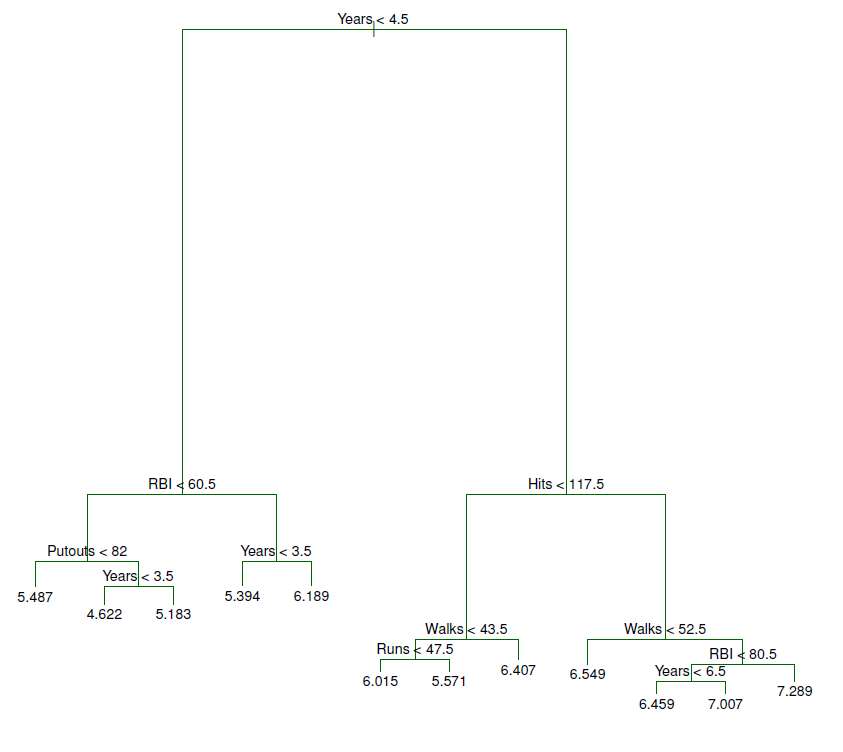

다음 그림은 validation error를 측정한 그림이다. 원래는 $\alpha$에 대해 작성되지만, $\alpha$는 tree 크기와 밀접하게 관련이 있고, tree 크기를 통해 나타내는 것이 보다 직관적이라 $x$-축은 tree의 크기로 되어 있다.

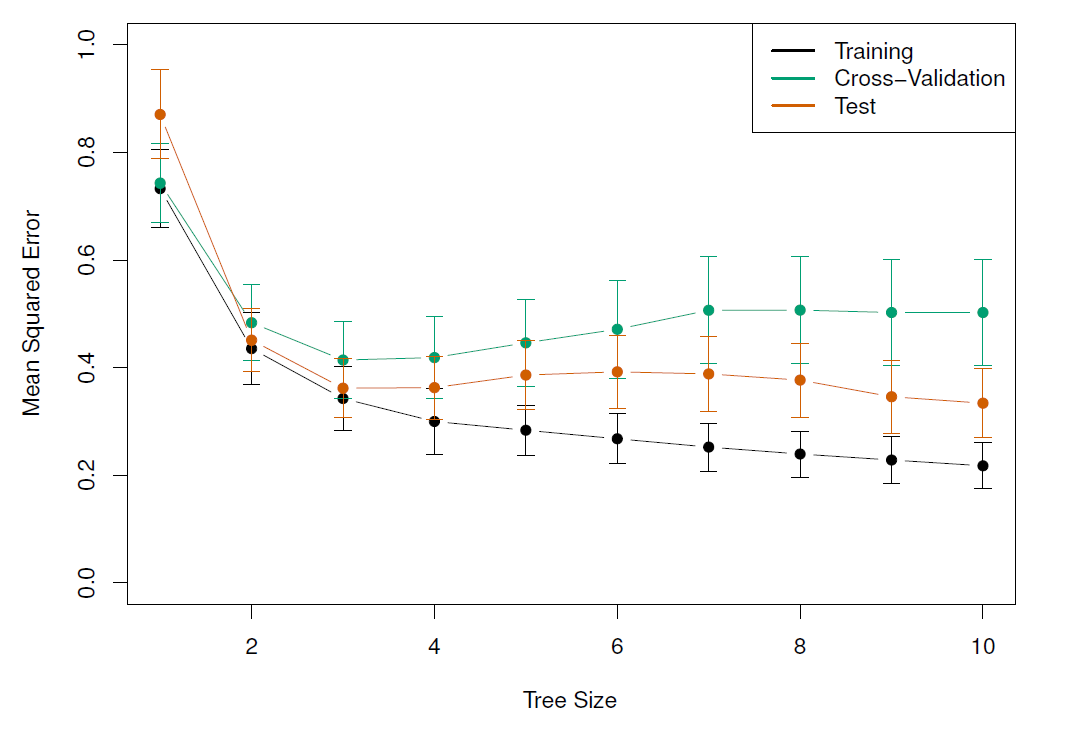

### Cost complexity pruning example

Minimal cost complexity pruning는 재귀적으로 "가장 약한 링크"를 가진 노드를 찾는다. 

가장 약한 링크는 $\alpha$로 특징지어지며, 유효 알파가 가장 작은 노드가 먼저 가지치기 된다. 

어떤 `ccp_alpha` 값이 적절한지에 대한 아이디어를 얻기 위해, scikit-learn은 가지 치기 프로세스의 각 단계에서 유효 알파 및 그에 해당하는 총 leaf impurity을 반환하는 `DecisionTreeClassifier.cost_complexity_pruning_path`를 제공한다. 

$\alpha$가 증가하면 더 많은 트리가 가지치기를 수행하므로 총 leaf impurity가 증가한다.

In [42]:
from sklearn.datasets import load_breast_cancer

In [43]:
X, y = load_breast_cancer(return_X_y = True)

In [44]:
X[1]

array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
       1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
       1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = tree.DecisionTreeClassifier(random_state=0)

In [46]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 'impurities': array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352])}

In [47]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [48]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [49]:
impurities

array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
       0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
       0.10634033, 0.14056508, 0.46786352])

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

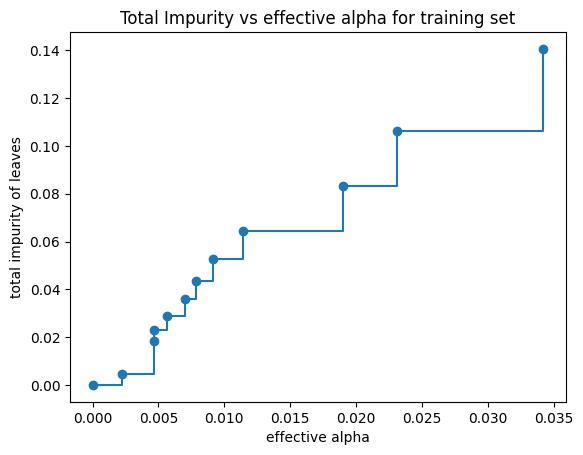

In [50]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [51]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


In [52]:
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0022664723976040134, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004647426339100881, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004659799593581376, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005633802816901408, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007042253521126761, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007841938420144537, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.009114019793328328, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011443661971830986, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.018988002086593604, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.023141627543035996, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.03422474765119576, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.3272984419327777, random_state=0)]

In [53]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

In [54]:
clfs[10].tree_.node_count

5

[Text(0.4, 0.8333333333333334, 'x[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.2, 0.5, 'gini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.6, 0.5, 'x[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

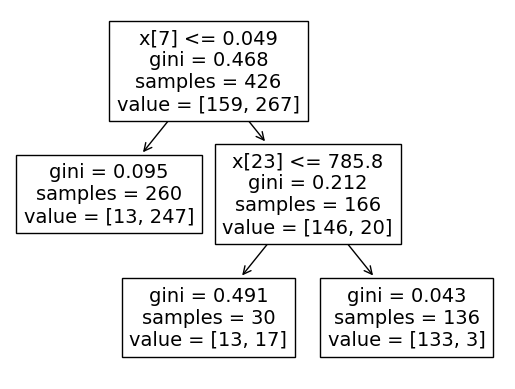

In [55]:
tree.plot_tree(clfs[-2])

In [56]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

In [57]:
node_counts

[31, 27, 21, 19, 17, 15, 13, 11, 9, 7, 5, 3]

In [58]:
depth

[8, 6, 4, 4, 4, 4, 4, 4, 3, 3, 2, 1]

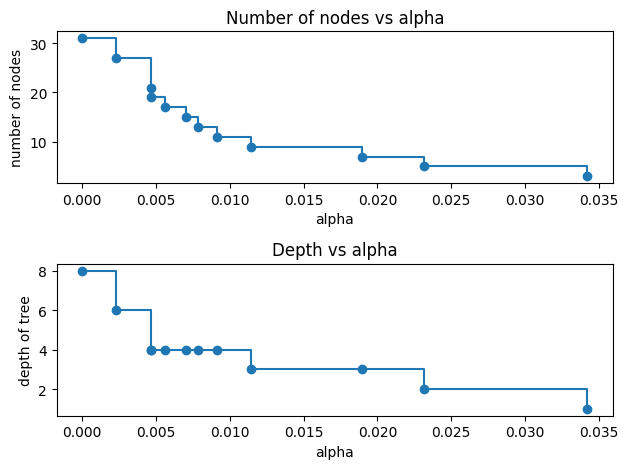

In [59]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [60]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [61]:
test_scores

[0.8811188811188811,
 0.8881118881118881,
 0.916083916083916,
 0.916083916083916,
 0.916083916083916,
 0.9230769230769231,
 0.9300699300699301,
 0.9300699300699301,
 0.9370629370629371,
 0.916083916083916,
 0.916083916083916,
 0.8811188811188811]

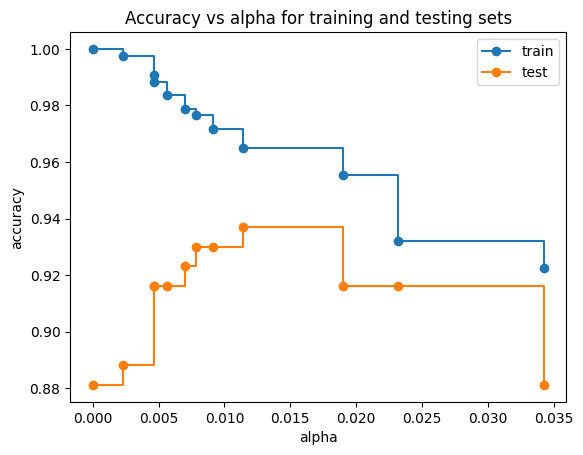

In [62]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

[Text(0.5, 0.875, 'x[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.25, 0.625, 'x[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.125, 0.375, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(0.375, 0.375, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.75, 0.625, 'x[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(0.625, 0.375, 'x[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.75, 0.125, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.875, 0.375, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

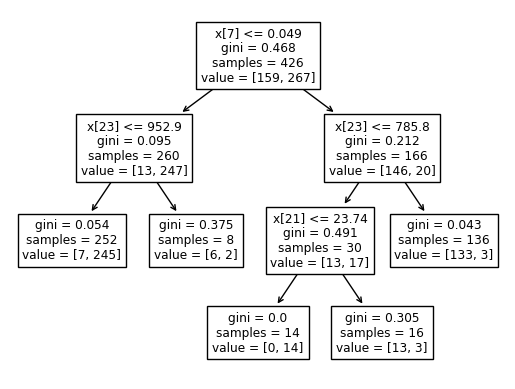

In [63]:
tree.plot_tree(clfs[8])

[Text(0.5595238095238095, 0.9444444444444444, 'x[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.35714285714285715, 0.8333333333333334, 'x[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.23809523809523808, 0.7222222222222222, 'x[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(0.14285714285714285, 0.6111111111111112, 'x[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(0.09523809523809523, 0.5, 'x[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(0.047619047619047616, 0.3888888888888889, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(0.14285714285714285, 0.3888888888888889, 'x[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(0.09523809523809523, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.19047619047619047, 0.2777777777777778, 'x[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(0.14285714285714285, 0.166666666666

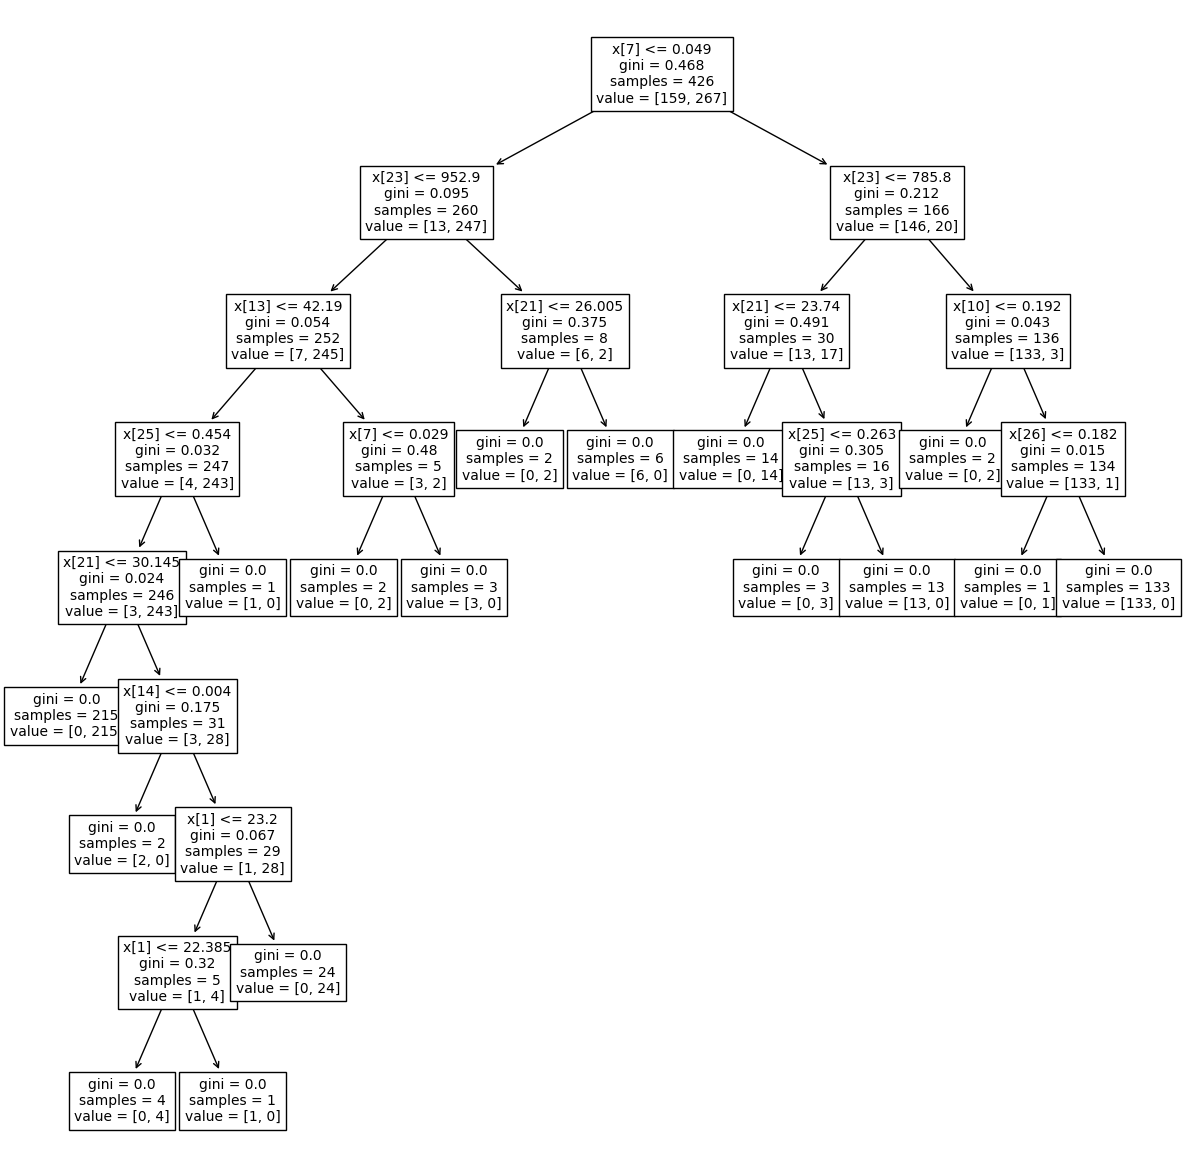

In [64]:
plt.figure(figsize=(15,15))  # set plot size (denoted in inches)

tree.plot_tree(clfs[0] , fontsize=10)